In [0]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot
from matplotlib import pyplot
from matplotlib import pylab
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet



In [0]:
data = datasets.make_regression(100,1,noise = 7)

In [0]:
data.__class__
for x in data:
  print(x.__class__)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
df=pd.DataFrame(data=np.c_[data[0],data[1]], columns=['X','Y'])

In [0]:
df.__class__
df.head()

,X,Y
0,0.523701,25.601316
1,0.201854,10.074136
2,0.226231,21.434529
3,-0.328654,-16.199123
4,0.191155,-8.917828


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


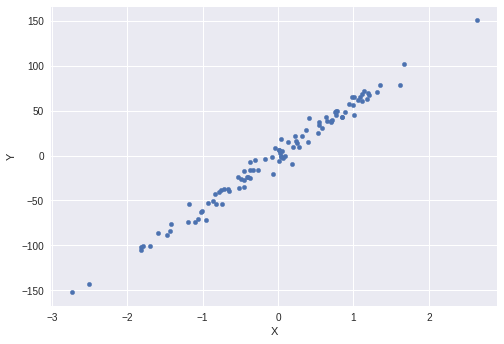

In [0]:
df.plot.scatter(x='X', y='Y')

In [0]:
lr = LinearRegression()
lr.fit(df.X.reshape(-1,1),df['Y'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
lr.coef_, lr.intercept_

(array([57.46000962]), 0.3224484964565846)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: numpy.arange
  


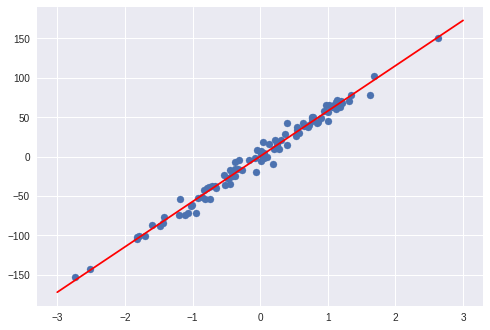

In [0]:
f = lambda x: lr.coef_[0] * x + lr.intercept_
steps = list(pylab.frange(-3,3,.25))
pyplot.plot(steps, list(map(f, steps)),color='red')
pyplot.scatter(x=df.X,y=df.Y)

In [0]:
data = datasets.load_boston()

In [0]:
data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [0]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [0]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


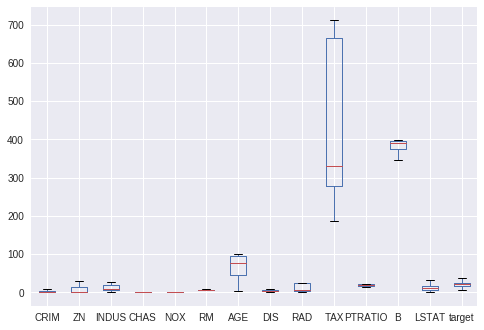

In [0]:
housing_df.plot.box()

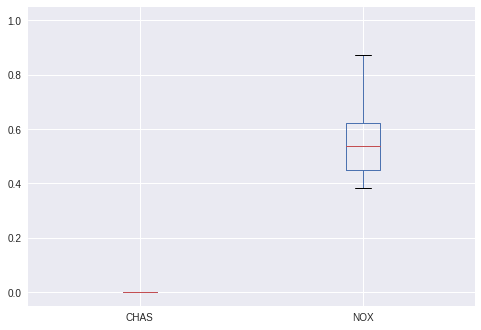

In [0]:
housing_df[['CHAS','NOX']].plot.box()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


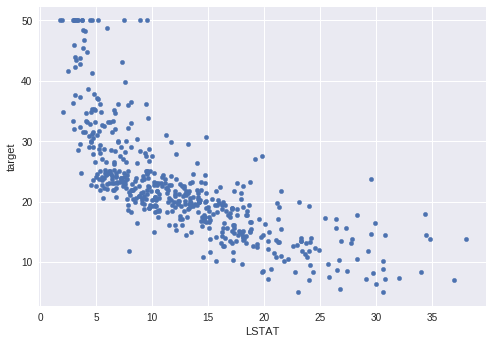

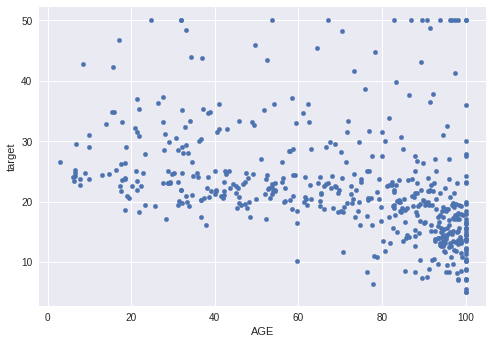

In [0]:
housing_df.plot.scatter(x='LSTAT',y='target')
housing_df.plot.scatter(x='AGE',y='target')

In [0]:
lr = LinearRegression()
X=housing_df[['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
y=housing_df['target']

In [0]:
lr.normalize=False
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
print(lr.predict([X.iloc[505]]))
print(np.dot(lr.coef_,X.iloc[505])+lr.intercept_)
print(y.iloc[505])

[22.34421229]
22.344212292903595
11.9


In [0]:
# lr.score(X,y)
# help(lr.score)
lr.__class__

sklearn.linear_model.base.LinearRegression

In [0]:
help(lr.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model.base.LinearRegression instance
    Returns the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples. For some estimators this may be a
        precomputed kernel matrix instead, shape = (n_samples,
        n_samples_fitted], where n_samples_fitted is the number of
        samples used in the fitting for the estimator.
    
    y : arra

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,lr.predict(X))

21.894831181729202

In [0]:
lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [0]:
print(housing_df.columns[lr.coef_.argmin()])
print(housing_df.columns[lr.coef_.argmax()])

NOX
RM


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


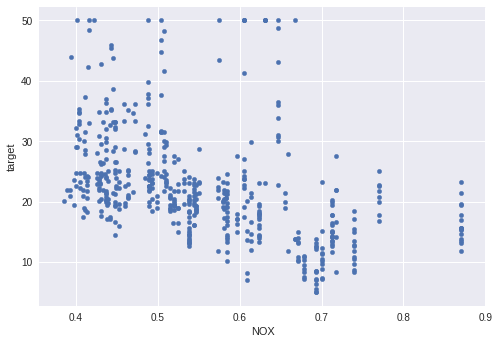

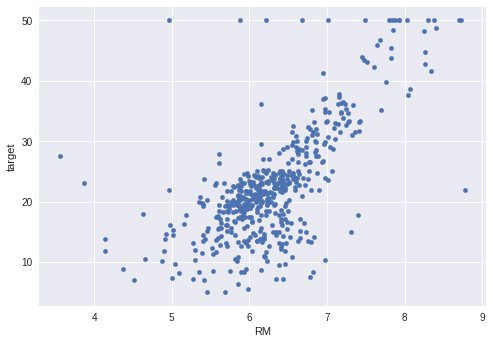

In [0]:
housing_df.plot.scatter(x='NOX',y='target')
housing_df.plot.scatter(x='RM',y='target')

# Ridge and Lasso (**Reguralization**)

In [0]:
lrr = Ridge()

In [0]:
lrr.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
lrr.coef_

array([-1.04595278e-01,  4.74432243e-02, -8.80467889e-03,  2.55239322e+00,
       -1.07770146e+01,  3.85400020e+00, -5.41453810e-03, -1.37265353e+00,
        2.90141589e-01, -1.29116463e-02, -8.76074394e-01,  9.67327945e-03,
       -5.33343225e-01])

In [0]:
print(lrr.predict([X.iloc[503]]))
print(np.dot(lrr.coef_,X.iloc[503])+lrr.intercept_)
print(y.iloc[503])

[27.92757]
27.927569998387956
23.9


In [0]:
lrl = Lasso()

In [0]:
lrl.fit(X,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
print(lrl.predict([X.iloc[505]]))
print(np.dot(lrl.coef_,X.iloc[505])+lrl.intercept_)
print(y.iloc[505])

[25.00026849]
25.00026848516093
11.9


In [0]:
mean_squared_error(y,lrl.predict(X))

26.79609915726647

# Here I didn't create a test or validation set.  This is bad. Use the code in the iris example to:
- shuffle the data, use a random_state = 1
- select 60% of the data as a training set, 20% as a test set and 20% as a validation set.
- does it effect the score?
- what is the mean_squared_error then?

# Note that many of the values were significantally out of scale in the box plots, i.e. TAX.
- How might you go about "normalizing" the data?
- Do you think this will improve or degrade the qualify of your regressor?
- ** Try to implement it

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          90.000000         90.000000          90.000000   
mean            5.452222          3.140000           2.731111   
std             0.663364          0.482223           1.463461   
min             4.300000          2.000000           1.000000   
25%             5.000000          2.900000           1.400000   
50%             5.400000          3.100000           1.700000   
75%             5.900000          3.400000           4.375000   
max             7.000000          4.400000           5.100000   

       petal width (cm)     target  
count         90.000000  90.000000  
mean           0.736667   0.444444  
std            0.573859   0.499688  
min            0.100000   0.000000  
25%            0.200000   0.000000  
50%            0.400000   0.000000  
75%            1.300000   1.000000  
max            1.800000   1.000000  


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          30.000000         30.000000          30.000000   
mean            6.253333          2.856667           5.113333   
std             0.767770          0.350057           0.975823   
min             4.900000          2.200000           3.000000   
25%             5.700000          2.600000           4.325000   
50%             6.250000          2.900000           5.100000   
75%             6.650000          3.000000           5.800000   
max             7.700000          3.800000           6.900000   

       petal width (cm)     target  
count         30.000000  30.000000  
mean           1.773333   1.666667  
std            0.454049   0.479463  
min            1.000000   1.000000  
25%            1.300000   1.000000  
50%            1.800000   2.000000  
75%            2.100000   2.000000  
max            2.500000   2.000000  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          3

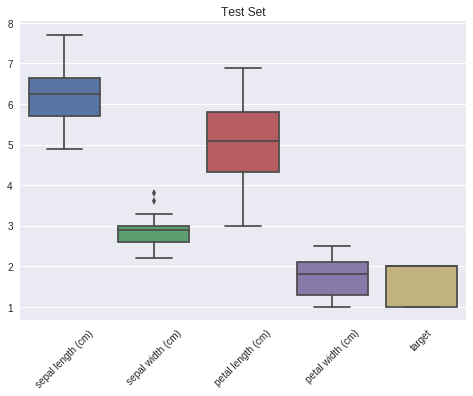

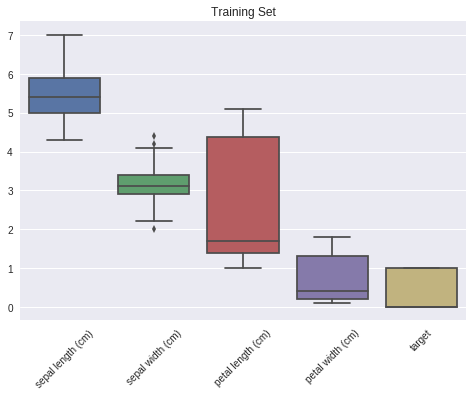

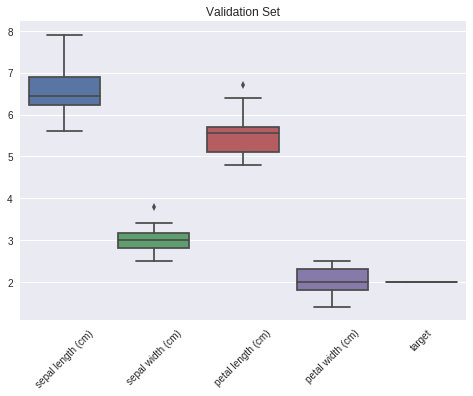

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb  8 20:31:54 2019

@author: mattias
"""

### HOMEWORK 2 ###
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pylab as plt
plt.xticks(rotation=45)

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

df.sample(frac=1,random_state=1).reset_index(drop=True)
df_train = df.head(int(float(df.shape[0])*0.6))
df_ends = df.tail(int(float(df.shape[0])*0.4))
df_test = df_ends.head(int(df_ends.shape[0]/2))
df_valid = df_ends.tail(int(df_ends.shape[0]/2))

df_train.name = "Training Set"
df_test.name = "Test Set"
df_valid.name = "Validation Set"

datas = [df_train,df_test,df_valid]

for c,x in enumerate(datas):
  plt.figure(c)
  plt.xticks(rotation=45)
  plt.title(x.name)
  sns.boxplot(data = x)
  print(x.describe())
  for n in df.columns:
    y = df.pop(n).values    
  
    

TypeError: ignored

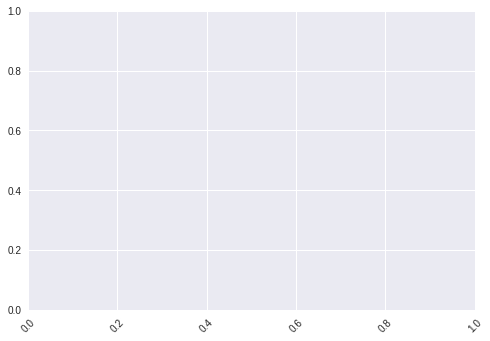

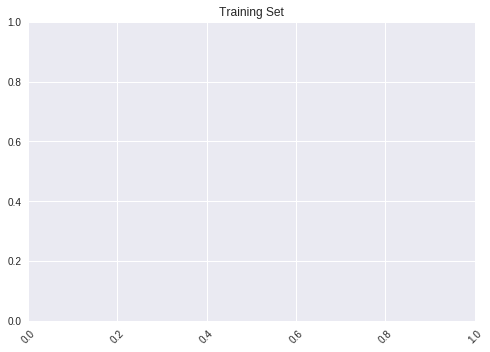

In [0]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pylab as plt
plt.xticks(rotation=45)

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

#df.sample(frac=1,random_state=1).reset_index(drop=True)
df = df.sample(frac=1,random_state=1)
df_train = df.head(int(float(df.shape[0])*0.6))
df_ends = df.tail(int(float(df.shape[0])*0.4))
df_test = df_ends.head(int(df_ends.shape[0]/2))
df_valid = df_ends.tail(int(df_ends.shape[0]/2))

df_train.name = "Training Set"
df_test.name = "Test Set"
df_valid.name = "Validation Set"

datas = [df_train,df_test,df_valid]

for c,x in enumerate(datas):
    plt.figure(c)
    plt.xticks(rotation=45)
    plt.title(x.name)
    sns.pairplot(x='sepal width (cm)',y='sepal length (cm)',data=x)
#     sns.scatterplot(x='petal width (cm)',y='petal length (cm)',data=x)
#     sns.scatterplot(x='sepal width (cm)',y='petal width (cm)',data=x)
#     sns.scatterplot(x='sepal length (cm)',y='petal length (cm)',data=x)

In [0]:
help(sns.pairplot)

# Does the splitting of the data affect the score?

Boxplots look mostly similar. Descriptive statistics are 